# PHYS 381 - Midterm#
### Siegfried Peschke - 30032136
#### February 20, 2019

## Introduction


In this project we will explore the Chebyshev polynomials and Lissajous curves and how they are connected. We will utilize the numerical methods we have learned so far in order to perform this analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as opt
import texttable as tt
import timeit
import unicodedata

## Task 1 - Chebyshev polynomials

Chebyshev polynomials are named after Pafnuty Chebyshev (sometimes written as Tschebyschev).  They are solutions to the Chebyshev differential equations

 $$ \left(1-x^{2}\right)y''-xy'+n^{2}y=0 $$
 
and

 $$ \left(1-x^{2}\right)y''-3xy'+n(n+2)y=0 $$

The Chebyshev polynomials of the first kind can be defined by the recurrence relation

 $$\begin{aligned}
 T_{0}(x)&=1\\T_{1}(x)&=x\\T_{n+1}(x)&=2xT_{n}(x)-T_{n-1}(x).
 \end{aligned} $$

### Task 1a - Write a function to evaluate the Chebyshev polynomials.

In [2]:
def Chebyshev1_recur(x, n):
    """
    This function evaluates the last term within a Chebyshev polynomial of degree n.
    
    Parameters:
        x: Independent variable of the Chebyshev polynomial.
        n: Degree of the Chebyshev polynomial where n >= 0.
    Returns:
        The n'th term of the Chebyshev polynomial evaluated at x.
    """
    if n == 0: #T_0 = 1
        return 1
    elif n == 1: #T_1 = x
        return x
    elif n > 1: #Recursion formula for n > 1
        return (2*x*Chebyshev1_recur(x, n-1)) - Chebyshev1_recur(x, n-2)

### Task 1b - Use your Chebyshev1_recur function to generate a good quality figure displaying the first six (n=0 to 5) Chebyshev polynomials plotted between x=-1 and x=+1.

In [3]:
def Chebyshev_poly(x, n):
    """
    This function generates each term of a Chebyshev polynomial of degree n in the form of a list.
    
    Parameters:
        x: Independent variable of the Chebyshev polynomial.
        n: Degree of the Chebyshev polynomial where n >= 0.
    Returns:
        A list of the terms of a Chebyshev polynomial up to degree n.
    """
    cheb_poly = [] #List which stores each term.
    for i in range(0, n+1): #Iterate such that each term of the polynomial up to and including n is generated.
        cheb_poly.append(float(Chebyshev1_recur(x, i))) #Append term i to the list.
    return cheb_poly #Return the entire list of terms

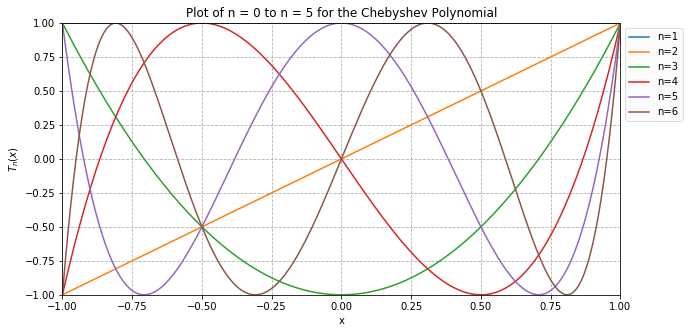

In [4]:
#Gridlines
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -1, 1])
plt.xticks(np.arange(-1, 1 + 0.25, 0.25))
plt.yticks(np.arange(-1, 1 + 0.25, 0.25))
plt.grid(linestyle='dashed')
#Labels
plt.xlabel('x')
plt.ylabel('$T_n(x)$')
plt.title("Plot of n = 0 to n = 5 for the Chebyshev Polynomial")

#Create the domain to be plotted
x = np.arange(-1, 1 + 0.01, 0.01)

#Function to be plotted
for i in range(0, 6):
    poly_name = "n=" + str(i+1)
    y = []
    for j in x:
        y.append(Chebyshev1_recur(j, i))
    plt.plot(x, y, label = poly_name)

#Legend
legend = plt.legend(bbox_to_anchor=(1, 1), loc=2)
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)

plt.show()

## Task 2 - Orthogonality

Chebyshev polynomials of the first kind are orthogonal over the range $[-1,+1]$.  This means that the weighted integral inner product is given by

 $$\int\limits_{-1}^{+1} \frac{T_n(x) \; T_m(x)}{\sqrt{1-x^2}} \; dx \;=\; \frac{1}{2}\pi\;\delta_{n,m} \qquad n\ne 0, m\ne 0$$

where the Kroneker delta function $\delta_{i,j}$ is 1 if $i=j$ and zero otherwise.

Use numerical integration to calculate the weighted integral inner product for $n=1,2,\ldots,N$ and $m=1,2,\ldots,n$.  Tabulate the results for $N=5$ and then determine the maximum value of $N$ which you can handle in a reasonable amount of time.

To do this we will first create a function which generates the integrand function, then write a second function to calculate this integral. This function will utilize the scipy.integrate.quad to evaluate the integral. Then finally a third function to tabulate the results.

In [5]:
def cheb_integrand(x, n, m):
    """
    This function evaluates the integrand of the Chebyshev weighted integral inner product where m <= n.
    
    Parameters:
        x: Independent variable of the Chebyshev polynomial.
        n: Degree of the first Chebyshev term where n != 0.
        m: Degree of the second Chbyshev term where m != 0.
    Returns:
        The integrand function.
    """
    return (Chebyshev1_recur(x, n)*Chebyshev1_recur(x, m)) / np.sqrt(1 - x*x) #Return the integrand.

In [6]:
def cheb_weighted_integral(N):
    """
    This function evaluates the Chebyshev weighted integral inner product.
    
    Parameters:
        N: Determines the order or maximum value of n and m.
    Returns:
        A list with nested list of the values for the integral for varying n and m.
        Each nested list indexes over values of n.
        Within the nested lists, results index over values of m.
    """
    result_list = []
    for n in range(1, N+1): #Iterate over n.
        result_list.append([])
        for m in range(1, N+1): #For each value of n, iterate over m.
            if m > n: #If the integral is not defined, return "-".
                result = "-"
            else: #If the integral is defined, calculate the integral.
                result = np.abs(round(integrate.quad(cheb_integrand, -1, 1, args=(n, m))[0], 5))
            result_list[n-1].append(result) #Creates a nested list of the results.
    return result_list

In [7]:
def tabulate_cheb_integral(N):
    """
    This function tabulates the results for the Chebyshev weighted integral inner product.
    
    Parameters:
        N: Determines the order or maximum value of n and m.
    Returns:
        A table of the results from cheb_weighted_integral.
    """
    rows = []
    cols = [' ']
    for k in range(1, N+1):
        rows.append('n = ' + str(k))
        cols.append('m = ' + str(k))
    
    result_list = cheb_weighted_integral(5)

    tab = tt.Texttable()
    tab.header(cols)
    for i in range(len(result_list)):
        row = result_list[i]
        row.insert(0, rows[i])
        tab.add_row(row)
    print("A Table of the Chebyshev Weighted Integrals for N = " + str(N))
    print(tab.draw())

In [8]:
#Produce the table for N=5.
tabulate_cheb_integral(5)

A Table of the Chebyshev Weighted Integrals for N = 5
+-------+-------+-------+-------+-------+-------+
|       | m = 1 | m = 2 | m = 3 | m = 4 | m = 5 |
+=======+=======+=======+=======+=======+=======+
| n = 1 | 1.571 | -     | -     | -     | -     |
+-------+-------+-------+-------+-------+-------+
| n = 2 | 0     | 1.571 | -     | -     | -     |
+-------+-------+-------+-------+-------+-------+
| n = 3 | 0     | 0     | 1.571 | -     | -     |
+-------+-------+-------+-------+-------+-------+
| n = 4 | 0     | 0     | 0     | 1.571 | -     |
+-------+-------+-------+-------+-------+-------+
| n = 5 | 0     | 0     | 0     | 0     | 1.571 |
+-------+-------+-------+-------+-------+-------+


To find the greatest value of N which can be handled in a "reasonable" amount of time, we will use %timeit until we reach a value of N which exceeds 5 seconds of computation time.

In [9]:
#Increase N until computation time exceeds 5 seconds. I found N=14 or N=15 seems to be where this occurs.
for N in range(0,16):
    print('N = ' + str(N))
    %timeit cheb_weighted_integral(N)

N = 0
324 ns ± 10.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
N = 1
903 µs ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
N = 2
2.51 ms ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
N = 3
6.73 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
N = 4
12.9 ms ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
N = 5
25.1 ms ± 28.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
N = 6
46.7 ms ± 736 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
N = 7
105 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
N = 8
169 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
N = 9
282 ms ± 994 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
N = 10
492 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
N = 11
937 ms ± 69.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
N = 12
1.79 s ± 281 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
N = 13

We find that at N = 14 or N = 15 the computation time exceeds 5 seconds. At this point the computation is no longer handled in a "reasonable" amount of time.

## Tast 3 - Lissajous Figures

In mathematics, a Lissajous curve is the graph of a system of parametric equations

 $$\begin{aligned} 
    x \;=\; &A \sin(a t+\delta ) \\
    y \;=\; &B \sin(b t)        
 \end{aligned}$$
    
The appearance of the figure is highly sensitive to the ratio  $a/b$.  Rational ratios produce closed (connected) or "still" figures, while irrational ratios produce figures that appear to rotate.

Assume that $A=B=1$, $a=3$, and $b=7$.

Note: No value for the phase, $\delta$, was given therefore we will simply assume it to be zero, although I will write the functions such that a value for $\delta$ may be specified. The period of these functions is $2\pi$ therefore we will only consider the domain $[0, 2\pi]$ as any results we find within this domain will repeat.

### Task 3a - Plot $x$ versus $y$ starting at $t=0$ and continuing until the pattern starts to repeat.

In [10]:
def lissajous_curve_x(t, A=1, a=3, delta=0):
    """
    This function returns the x coordinate of the parametric equations for a Lissajous curve.
    """
    return A*np.sin(a*t + delta)

def lissajous_curve_y(t, B=1, b=7):
    """
    This function returns the y coordinate of the parametric equations for a Lissajous curve.
    """
    return B*np.sin(b*t)

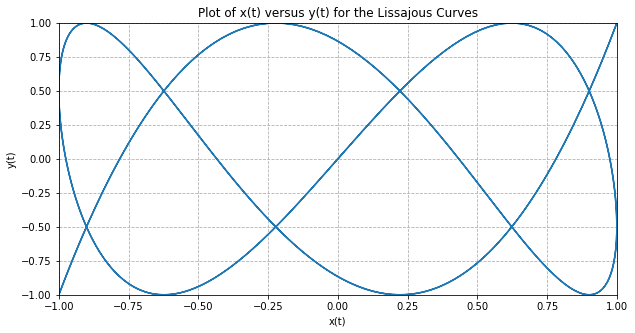

In [11]:
#Gridlines
plt.figure(figsize=(10,5))
plt.axis([-1, 1, -1, 1])
plt.xticks(np.arange(-1, 1 + 0.25, 0.25))
plt.yticks(np.arange(-1, 1 + 0.25, 0.25))
plt.grid(linestyle='dashed')
#Labels
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title("Plot of x(t) versus y(t) for the Lissajous Curves")

#Create the domain to be plotted
t = np.arange(0, 2*np.pi + 0.01, 0.01)

#Function to be plotted
plt.plot(lissajous_curve_x(t), lissajous_curve_y(t))

plt.show()

### Task 3b - If $x(t)$ and $y(t)$ give the location of an object in the $x,y$ plane, what is the maximum speed of the object $\left| \vec v(t) \right|$?  At which time $t$ does it occur? 

If

$$
\vec{r}(t) = 
\begin{cases}
    r_x = A\sin(at+\delta) \\
    r_y = B\sin(bt)
\end{cases}
$$

then

$$
\vec{v}(t) = \frac{d}{dt}\vec{r}(t) =
\begin{cases}
    v_x = aA\cos(at+\delta) \\
    v_y = bB\cos(bt)
\end{cases}
$$

where the magnitude of a vector $\vec{p}(t)$ is given by $|\vec{p}(t)| = \sqrt{{p_x}^2 + {p_y}^2}$

In [12]:
def v_mag(t, A=1, B=1, a=3, b=7, delta=0):
    """
    This function returns the speed at time t of the object.
    """
    return np.sqrt((a*A*np.cos(a*t + delta))**2 + (b*B*np.cos(b*t))**2)

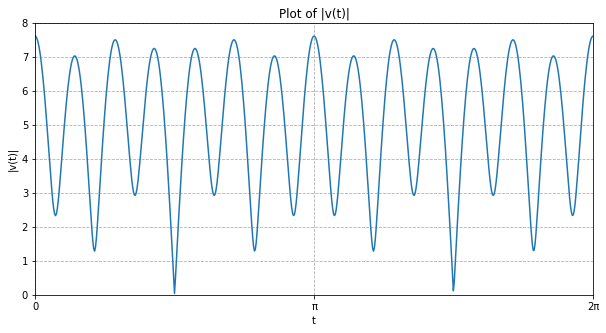

In [13]:
#Set labels for x-axis tickmarks
labels = [0, unicodedata.lookup("GREEK SMALL LETTER PI"), 
          str(2)+unicodedata.lookup("GREEK SMALL LETTER PI")]

#Gridlines
plt.figure(figsize=(10,5))
plt.axis([0, 2*np.pi, 0, 8])
plt.xticks(np.arange(0, 2*np.pi+1, np.pi), labels)
plt.yticks(np.arange(0, 8 + 1, 1))
plt.grid(linestyle='dashed')
#Labels
plt.xlabel('t')
plt.ylabel('|v(t)|')
plt.title("Plot of |v(t)|")

#Create the domain to be plotted
t = np.arange(0, 2*np.pi + 0.01, 0.01)

#Function to be plotted
plt.plot(t, v_mag(t))

plt.show()

In [14]:
def get_max_speed(domain):
    """
    This function finds the maximum speed of the object over an interval.
    """
    max_speed = 0
    for t in domain:
        if v_mag(t) > max_speed:
            max_speed = round(v_mag(t), 4)
    return max_speed

In [15]:
def get_time_max_speed(domain):
    """
    This function finds the times at which the maximum speed of the object occurs over an interval.
    """
    times = []
    max_speed = get_max_speed(domain)
    for t in domain:
        if round(v_mag(t), 4) == max_speed:
            times.append(round(t, 10))
    return times

In [16]:
#Find the maximum speed and the times at which the object reaches this speed over the interval [0, 2pi]
domain = np.linspace(0, 2*np.pi, 1001)
print("Max speed is v =", get_max_speed(domain))
for t in get_time_max_speed(domain):
    print("Max speed occurs at t =", t)

Max speed is v = 7.6158
Max speed occurs at t = 0.0
Max speed occurs at t = 3.1415926536
Max speed occurs at t = 6.2831853072


When comparing the graph of $|v(t)|$ and the computed results, we find they are in agreement. We can see that in the plot, the maximum values for $|v(t)|$ occur at 0, $\pi$, and $2\pi$. The computed results agree with this and tell us the maximum speed is v = 7.6158.

## Task 4 - The Connection

For Lissajous figures where $A=B=1$, a = 1, b = N (N is a natural number) and
 
$$ \delta ={\frac {N-1}{N}}{\frac {\pi }{2}} $$
 
it can be shown that y(x) are Chebyshev polynomials of the first kind with degree N.

To check this claim, we will consider the following x-values for n=5

$$ x_k = \cos \left( \frac{2k-1}{2n} \pi \right), \quad k=1,\ldots,n $$

In [17]:
def x_k_values(n):
    """
    This function returns a list of the x_k values from 1 to n.
    """
    x_k_values = [] #Create a list of the x-values we will consider.
    for k in range(1, n+1): #Create each x-value and append to the list.
        x_k_values.append(np.cos((2*k-1)*np.pi/(2*n)))
    return x_k_values

To obtain y as a function of x we express t as a function of x and then substitute into y(t) to obtain y(x)

$$ x = A\sin(at + \delta) \rightarrow t = \frac{1}{a}\left(\sin^{-1}\left(\frac{x}{A}\right) - \delta\right) $$

therefore

$$ y(x) = B\sin\left(\frac{b}{a}\left(\sin^{-1}\left(\frac{x}{A}\right) - \delta\right)\right) $$

Now substitute $A=B=1$, a = 1, b = N and $ \delta ={\frac {N-1}{N}}{\frac {\pi }{2}} $

$$ y(x) = \sin\left(N\left(\sin^{-1}(x) - {\frac {N-1}{N}}{\frac {\pi }{2}}\right)\right) $$

Let us now create a function which calculates y(x) and another to create a table of comparison between the Chebyshev polynomial and this special case Lissajous function.

In [18]:
def lissajous_y_x(x, N):
    """
    This function calculates y(x) for a given degree N.
    """
    delta = ((N-1)/N)*(np.pi/2.0)
    return np.sin(N*(np.arcsin(x) - delta))

In [19]:
def tabulate_cheb_liss(n, N):
    """
    This function generates a table of the Chebyshev and Lissajous results for given x_k values.
    
    Parameters:
        n: The order of x_k values generated from 1 up to and including n.
        N: The degree of the Chebyshev polynomial.
    Returns:
        Tabulated results of the Chebyshev and Lissajous functions at a given x_k as well as the difference.
    """
    cols = ["x_k", "Chebyshev", "Lissajous", "Difference"]
    x_k_vals = x_k_values(n)
    all_results = []
    
    for x_k in x_k_vals:
        results = []
        cheb_val = Chebyshev1_recur(x_k, N)
        liss_val = lissajous_y_x(x_k, N)
        results.append(x_k)
        results.append(cheb_val)
        results.append(liss_val)
        results.append(np.abs(cheb_val - liss_val))
        all_results.append(results)
    
    tab = tt.Texttable()
    tab.header(cols)
    for i in range(len(all_results)):
        row = all_results[i]
        tab.add_row(row)
    print("A Table of Values for Chebyshev and Lissajous functions at x_k for n = " 
          + str(n), "and N = " + str(N))
    print(tab.draw())

In [20]:
#Generate a table for n = 5 and a degree of N = 2.
tabulate_cheb_liss(5, 2)

A Table of Values for Chebyshev and Lissajous functions at x_k for n = 5 and N = 2
+--------+-----------+-----------+------------+
|  x_k   | Chebyshev | Lissajous | Difference |
+========+===========+===========+============+
| 0.951  | 0.809     | 0.809     | 0.000      |
+--------+-----------+-----------+------------+
| 0.588  | -0.309    | -0.309    | 0.000      |
+--------+-----------+-----------+------------+
| 0.000  | -1        | -1        | 0          |
+--------+-----------+-----------+------------+
| -0.588 | -0.309    | -0.309    | 0.000      |
+--------+-----------+-----------+------------+
| -0.951 | 0.809     | 0.809     | 0.000      |
+--------+-----------+-----------+------------+


We can see from the table that the Chebyshev polynomial and the special case Lissajous function are equal up to a precision of $10^{-3}$. Unfortunately the texttable rounds to 3 decimal places so we cannot be sure of further precision. In order to gain further precision, let us create a plot of the Chebyshev vs Lissajous functions in order to see the relation. We expect a linear relation with slope = 1 and y-intercept = 0.

In [21]:
def plot_cheb_liss(n, N):
    """
    This function blah
    """
    x_k_vals = x_k_values(n)
    cheb_results = []
    liss_results = []
    
    for x_k in x_k_vals:
        cheb_results.append(Chebyshev1_recur(x_k, N))
        liss_results.append(lissajous_y_x(x_k, N))
        
    #Gridlines
    plt.figure(figsize=(8,8))
    plt.axis([-1, 1, -1, 1])
    plt.xticks(np.arange(-1, 1 + 0.25, 0.25))
    plt.yticks(np.arange(-1, 1 + 0.25, 0.25))
    plt.grid(linestyle='dashed')
    #Labels
    plt.xlabel('Chebyshev')
    plt.ylabel('Lissajous')
    plt.title("Plot Chebyshev vs Lissajous for order N = " + str(N))

    #Function to be plotted
    plt.plot(cheb_results, liss_results, '--bo')

    plt.show()

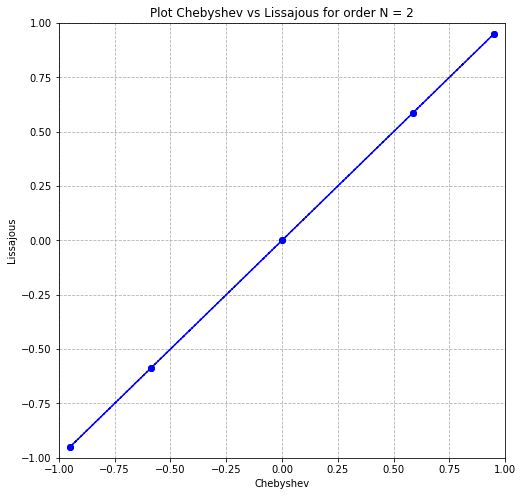

In [22]:
#Generate a plot for n = 10 and a degree of N = 2.
plot_cheb_liss(10, 2)

From the plot and the interesections of the best fit line with the gridlines, we can clearly see that the slope = 1 and the y-intercept = 0, as we expected for plotting two equal functions against each other. Furthermore, we can see that these two functions are equal if we vary the order N, I have written the tabulating/plotting functions in such a way that you can do this with ease.

## Conclusion

The goal of this project was to apply methods of computation analysis to solve given problems. To solve the problems presented in this project, we utilized computational integration, creating a recursive function, passing and returning unevaluated functions, presenting data using tables and plots and analysis of results. These concepts are becoming easier to use the more they are utilized in solving problems and indicates progress in the understanding of numerical methods and computing.

An interesting note is that previously in the course, recursion was said to be computationally time-ineffective, however we utilized it in task 1 and it greatly simplified the code. This lends to the idea that although in general, certain computational methods are not favorable, it is better to consider computational methods on a case by case basis and determine whether or not a certain method is best suited for a specific problem.

In the final task, we showed the underlying connection between Chebyshev polynomials and Lissajous figures. Analyzing the differences we found none as far as computational precision allowed.

As a result of this project, we learn that there are often more than one way to perform calculations. Seeing that the Chebyshev polynomials are equal to the special case of Lissajous figures reinforces this idea. However, we must always interpret results with he nature of performing calculations using a computer in mind and the effect floating point numbers may have on results.